In [1]:
import pandas as pd
import pickle
from ctgan import CTGAN


In [32]:
import pandas as pd
import pickle

# Load the dataset from the PCL file
with open('/Users/atishayjain/Downloads/LinkedIn-Dataset-main/LinkedIn_Dataset.pcl', 'rb') as file:
    df = pickle.load(file)

# Select the specified columns
df = df[['Photo', 'Location', 'Workplace', 'Connections', 'Followers', 'Number of Activities']]

# Print the first few rows to understand the structure
print(df.head())

# Ensure that all numeric columns have only positive values
numeric_columns = ['Connections', 'Followers', 'Number of Activities']
for column in numeric_columns:
    df[column] = df[column].clip(lower=0)

# Save the processed data to a new PCL file
with open('/Users/atishayjain/Downloads/LinkedIn-Dataset-main/LinkedIn_Dataset_clippedx1.pcl', 'wb') as file:
    pickle.dump(df, file)

print("Processed data saved as 'LinkedIn_Dataset_clipped.pcl'")


  Photo                        Location  \
0    No            Wuxi, Jiangsu, China   
1    No     Noida, Uttar Pradesh, India   
2   Yes     Hyderabad, Telangana, India   
3   Yes                Belgrade, Serbia   
4   Yes  Dublin, County Dublin, Ireland   

                                           Workplace Connections Followers  \
0  Jiangsu Junyao mainly offer services to cement...         500       717   
1                                   Software Analyst         500      1340   
2                       Senior Consultant at Infosys           7         7   
3                                                 --           0         0   
4                                                 --          61        61   

  Number of Activities  
0                    1  
1                    0  
2                    0  
3                    0  
4                    6  
Processed data saved as 'LinkedIn_Dataset_clipped.pcl'


In [24]:
# Load the dataset from the PCL file
with open('/Users/atishayjain/Downloads/LinkedIn-Dataset-main/LinkedIn_Dataset.pcl', 'rb') as file:
    df = pickle.load(file)
df = df[['Photo','Location','Workplace','Connections','Followers','Number of Activities']]
# Print the first few rows to understand the structure
print(df.head())


  Photo                        Location  \
0    No            Wuxi, Jiangsu, China   
1    No     Noida, Uttar Pradesh, India   
2   Yes     Hyderabad, Telangana, India   
3   Yes                Belgrade, Serbia   
4   Yes  Dublin, County Dublin, Ireland   

                                           Workplace Connections Followers  \
0  Jiangsu Junyao mainly offer services to cement...         500       717   
1                                   Software Analyst         500      1340   
2                       Senior Consultant at Infosys           7         7   
3                                                 --           0         0   
4                                                 --          61        61   

  Number of Activities  
0                    1  
1                    0  
2                    0  
3                    0  
4                    6  


In [25]:
# Identify categorical columns (adjust as needed based on your dataset)
categorical_columns = ['Photo','Location','Workplace']

In [38]:
df

,Photo,Location,Workplace,Connections,Followers,Number of Activities
0,No,"Wuxi, Jiangsu, China",Jiangsu Junyao mainly offer services to cement...,500,717,1
1,No,"Noida, Uttar Pradesh, India",Software Analyst,500,1340,0
2,Yes,"Hyderabad, Telangana, India",Senior Consultant at Infosys,7,7,0
3,Yes,"Belgrade, Serbia",--,0,0,0
4,Yes,"Dublin, County Dublin, Ireland",--,61,61,6
...,...,...,...,...,...,...
3595,Yes,NaN,NaN,106,717,4
3596,Yes,NaN,NaN,102,6,3
3597,Yes,NaN,NaN,435,10,0
3598,Yes,NaN,NaN,280,34,4


In [26]:
# Initialize and train the CTGAN model
ctgan = CTGAN(epochs=100)  # Adjust epochs as needed
ctgan.fit(df, discrete_columns=categorical_columns)  # Pass the categorical columns explicitly


In [29]:
# Generate synthetic data
synthetic_data = ctgan.sample(len(df))
# Ensure that all numeric columns have only positive values
for column in ['Connections', 'Followers', 'Number of Activities']:
    synthetic_data[column] = synthetic_data[column].clip(lower=0)

# Save the synthetic data to a new PCL file
with open('synthetic_dataset3.pcl', 'wb') as file:
    pickle.dump(synthetic_data, file)

# Print the synthetic data
print(synthetic_data.head())

  Photo                                Location  \
0   Yes                                  Canada   
1   Yes                           United States   
2   Yes       Brooklyn, New York, United States   
3    No  Cherry Hill, New Jersey, United States   
4   Yes                           United States   

                                           Workplace  Connections  Followers  \
0                                                NaN          496          0   
1  If your actions inspire others to dream more, ...          489          0   
2                               --Investment Partner          495          0   
3  Creative Consultant, Connector and Community b...          497          0   
4    Marketing Manager | Personal Finance Instructor          111          0   

   Number of Activities  
0                     7  
1                     4  
2                     0  
3                     0  
4                     7  


In [37]:
synthetic_data

,Photo,Location,Workplace,Connections,Followers,Number of Activities
0,1,104,2188,496,0,7
1,1,661,1113,489,0,4
2,1,92,18,495,0,0
3,0,125,526,497,0,0
4,1,661,1382,111,0,7
...,...,...,...,...,...,...
3595,1,81,727,496,0,3
3596,0,361,2144,0,0,7
3597,1,529,1390,500,0,9
3598,1,711,1989,207,0,13


In [30]:
synthetic_data.to_csv('synthetic_dataset3.csv', index=False)

In [31]:
# Load the dataset from the PCL file
with open('/Users/atishayjain/synthetic_dataset3.pcl', 'rb') as file:
    df2 = pickle.load(file)
#df = df[['Photo','Location','Connections','Followers','Number of Activities']]
# Print the first few rows to understand the structure
print(df2.head())

  Photo                                Location  \
0   Yes                                  Canada   
1   Yes                           United States   
2   Yes       Brooklyn, New York, United States   
3    No  Cherry Hill, New Jersey, United States   
4   Yes                           United States   

                                           Workplace  Connections  Followers  \
0                                                NaN          496          0   
1  If your actions inspire others to dream more, ...          489          0   
2                               --Investment Partner          495          0   
3  Creative Consultant, Connector and Community b...          497          0   
4    Marketing Manager | Personal Finance Instructor          111          0   

   Number of Activities  
0                     7  
1                     4  
2                     0  
3                     0  
4                     7  


Distribution similarity for Connections: 71.03111111111112
Distribution similarity for Followers: 16080.999444445006
Distribution similarity for Number of Activities: 1.62
Categorical similarity for Photo: 0.1983333333333333
Categorical similarity for Location: 0.5834337967371024
Categorical similarity for Workplace: 0.7497241505740089
Correlation matrix similarity: 0.5331009784010834
Accuracy of model trained on synthetic data: 0.4375


/var/folders/jl/c6s43xsx1j71x89_f326tykw0000gn/T/ipykernel_91268/2117957121.py:83: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[column], label='Real', shade=True)
/var/folders/jl/c6s43xsx1j71x89_f326tykw0000gn/T/ipykernel_91268/2117957121.py:84: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[column], label='Synthetic', shade=True)


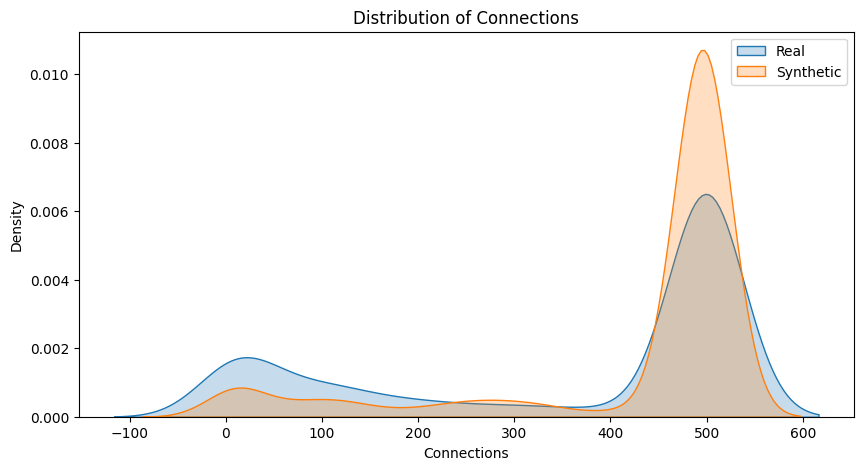

/var/folders/jl/c6s43xsx1j71x89_f326tykw0000gn/T/ipykernel_91268/2117957121.py:83: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[column], label='Real', shade=True)
/var/folders/jl/c6s43xsx1j71x89_f326tykw0000gn/T/ipykernel_91268/2117957121.py:84: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[column], label='Synthetic', shade=True)


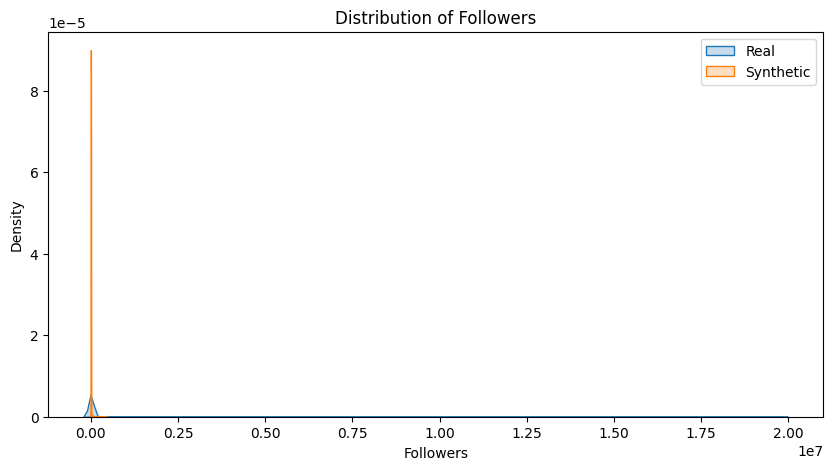

/var/folders/jl/c6s43xsx1j71x89_f326tykw0000gn/T/ipykernel_91268/2117957121.py:83: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[column], label='Real', shade=True)
/var/folders/jl/c6s43xsx1j71x89_f326tykw0000gn/T/ipykernel_91268/2117957121.py:84: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_data[column], label='Synthetic', shade=True)


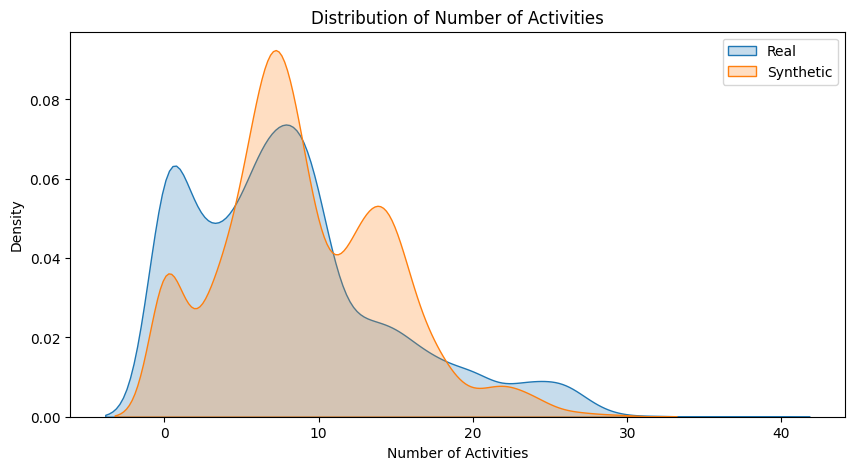

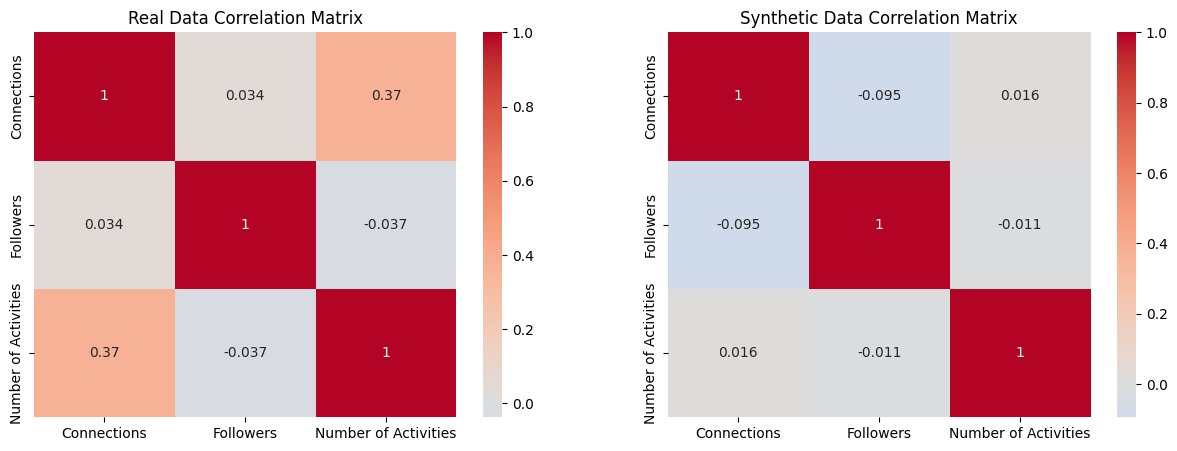

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import LabelEncoder

# Load the real and synthetic datasets
with open('/Users/atishayjain/Downloads/LinkedIn-Dataset-main/LinkedIn_Dataset_clippedx1.pcl', 'rb') as file:
    real_data = pickle.load(file)

with open('/Users/atishayjain/synthetic_dataset3.pcl', 'rb') as file:
    synthetic_data = pickle.load(file)

# Select the same columns for both datasets
real_data = real_data[['Photo', 'Location', 'Workplace', 'Connections', 'Followers', 'Number of Activities']]
synthetic_data = synthetic_data[['Photo', 'Location', 'Workplace', 'Connections', 'Followers', 'Number of Activities']]

# Function to calculate distribution similarity
def distribution_similarity(real, synthetic, column):
    return wasserstein_distance(real[column], synthetic[column])

# Function to calculate categorical feature similarity
def categorical_similarity(real, synthetic, column):
    real_counts = real[column].value_counts(normalize=True)
    synthetic_counts = synthetic[column].value_counts(normalize=True)
    categories = sorted(set(real_counts.index).union(set(synthetic_counts.index)))
    real_counts = real_counts.reindex(categories, fill_value=0)
    synthetic_counts = synthetic_counts.reindex(categories, fill_value=0)
    return np.sum(np.abs(real_counts - synthetic_counts))

# Function to calculate correlation matrix similarity
def correlation_similarity(real, synthetic):
    real_corr = real.corr().values
    synthetic_corr = synthetic.corr().values
    return np.linalg.norm(real_corr - synthetic_corr)

# Distribution similarity for numerical columns
numerical_columns = ['Connections', 'Followers', 'Number of Activities']
for column in numerical_columns:
    dist_sim = distribution_similarity(real_data, synthetic_data, column)
    print(f'Distribution similarity for {column}: {dist_sim}')

# Categorical similarity for categorical columns
categorical_columns = ['Photo', 'Location', 'Workplace']
for column in categorical_columns:
    cat_sim = categorical_similarity(real_data, synthetic_data, column)
    print(f'Categorical similarity for {column}: {cat_sim}')

# Correlation matrix similarity (using only numeric columns)
corr_sim = correlation_similarity(real_data[numerical_columns], synthetic_data[numerical_columns])
print(f'Correlation matrix similarity: {corr_sim}')

# Encode categorical columns for machine learning efficacy
le = LabelEncoder()
for column in categorical_columns:
    real_data[column] = le.fit_transform(real_data[column])
    synthetic_data[column] = le.transform(synthetic_data[column])

# Machine Learning Efficacy
# Assume 'Photo' is the target variable (adjust as needed)
target = 'Photo'
features = [col for col in real_data.columns if col != target]

# Split real data into training and testing sets
train_data = real_data.sample(frac=0.8, random_state=42)
test_data = real_data.drop(train_data.index)

# Train a classifier on synthetic data
clf = RandomForestClassifier()
clf.fit(synthetic_data[features], synthetic_data[target])

# Evaluate on real test data
predictions = clf.predict(test_data[features])
accuracy = accuracy_score(test_data[target], predictions)
print(f'Accuracy of model trained on synthetic data: {accuracy}')

# Plotting the distribution comparison
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(real_data[column], label='Real', shade=True)
    sns.kdeplot(synthetic_data[column], label='Synthetic', shade=True)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

# Plotting the correlation matrix comparison (numeric columns only)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(real_data[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Real Data Correlation Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_data[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Synthetic Data Correlation Matrix')

plt.show()


In [36]:
# Set arbitrary thresholds for this example (adjust based on your domain and data characteristics)
wasserstein_threshold = 100.0
categorical_similarity_threshold = 0.3
correlation_similarity_threshold = 0.1
accuracy_threshold = 0.7

# Print results and compare with thresholds
print("Distribution Similarity Metrics:")
for column in numerical_columns:
    dist_sim = distribution_similarity(real_data, synthetic_data, column)
    print(f'{column}: {dist_sim} ({"Good" if dist_sim < wasserstein_threshold else "Poor"})')

print("\nCategorical Similarity Metrics:")
for column in categorical_columns:
    cat_sim = categorical_similarity(real_data, synthetic_data, column)
    print(f'{column}: {cat_sim} ({"Good" if cat_sim < categorical_similarity_threshold else "Poor"})')

corr_sim = correlation_similarity(real_data[numerical_columns], synthetic_data[numerical_columns])
print(f'\nCorrelation Matrix Similarity: {corr_sim} ({"Good" if corr_sim < correlation_similarity_threshold else "Poor"})')

accuracy = accuracy_score(test_data[target], predictions)
print(f'\nMachine Learning Efficacy (Accuracy): {accuracy} ({"Good" if accuracy >= accuracy_threshold else "Poor"})')


Distribution Similarity Metrics:
Connections: 71.03111111111112 (Good)
Followers: 16080.999444445006 (Poor)
Number of Activities: 1.62 (Good)

Categorical Similarity Metrics:
Photo: 0.1983333333333333 (Good)
Location: 0.6966666666666668 (Poor)
Workplace: 0.8516666666666668 (Poor)

Correlation Matrix Similarity: 0.5331009784010834 (Poor)

Machine Learning Efficacy (Accuracy): 0.4375 (Poor)


To evaluate the quality of the synthetic data generated by CTGAN, you can use several evaluation metrics. Common metrics include:

1. **Distributional Similarity**: Comparing the distributions of numerical features in the real and synthetic datasets.
2. **Categorical Feature Distribution**: Comparing the frequency distributions of categorical features.
3. **Correlation Matrix Similarity**: Comparing the correlation matrices of the real and synthetic datasets.
4. **Machine Learning Efficacy**: Training a machine learning model on the synthetic data and evaluating its performance on real data.

### Key Points:

1. **Distributional Similarity**:
   - Calculate the Wasserstein distance (Earth Mover's Distance) for numerical features to assess how close the distributions are.

2. **Categorical Feature Distribution**:
   - Compare the frequency distributions of categorical features by summing the absolute differences.

3. **Correlation Matrix Similarity**:
   - Calculate the Frobenius norm of the difference between the correlation matrices of the real and synthetic datasets.

4. **Machine Learning Efficacy**:
   - Train a RandomForestClassifier on the synthetic data and evaluate its performance on a holdout set of the real data.

5. **Visualization**:
   - Plot the distribution of numerical features in real and synthetic datasets.
   - Plot the correlation matrices of real and synthetic datasets for visual comparison.



The error occurs because the machine learning model expects numeric data, but some of the columns (like 'Photo') are categorical and contain string values. You need to encode these categorical variables into numeric values before using them in the model. You can use one-hot encoding for this purpose.

### Key Points:
1. **Load the Real and Synthetic Datasets**:
   - Load the real and synthetic datasets from the PCL files and select the necessary columns.

2. **Distribution Similarity**:
   - Calculate the Wasserstein distance (Earth Mover's Distance) for numerical features.

3. **Categorical Feature Distribution**:
   - Compare the frequency distributions of categorical features.

4. **Correlation Matrix Similarity**:
   - Calculate the Frobenius norm of the difference between the correlation matrices of the real and synthetic datasets.

5. **Machine Learning Efficacy**:
   - Encode categorical columns using `LabelEncoder`.
   - Train a `RandomForestClassifier` on the synthetic data and evaluate its performance on the real data.

6. **Visualization**:
   - Plot the distribution of numerical features in real and synthetic datasets.
   - Plot the correlation matrices of real and synthetic datasets for visual comparison.



Exclude Non-Numeric Columns: Only include numeric columns for the correlation matrix similarity calculation.
One-Hot Encode Categorical Columns: Ensure proper encoding before using in machine learning models.
Key Points:
Exclude Non-Numeric Columns: Only numeric columns (['Connections', 'Followers', 'Number of Activities']) are used for correlation matrix similarity calculation.

One-Hot Encode Categorical Columns: Ensure that categorical columns are properly encoded using LabelEncoder before using them in machine learning models.

Visualization: Plot the distribution of numerical features and correlation matrices for visual comparison.



To determine if the synthetic data is "good," you can compare the evaluation metrics with benchmarks or use them to establish thresholds. Here's a summary of the benchmarks for each metric:

1. **Distribution Similarity** (Wasserstein Distance):
   - Lower values indicate that the synthetic data closely follows the distribution of the real data.
   - For a good synthetic dataset, the Wasserstein distance should be relatively small. There is no universal threshold, but you can establish one based on your specific context and dataset characteristics.

2. **Categorical Feature Similarity**:
   - Lower values indicate that the frequency distribution of categorical features in the synthetic data is similar to the real data.
   - Similar to the distribution similarity, a smaller value is better. You might need to set a threshold based on exploratory analysis of your data.

3. **Correlation Matrix Similarity**:
   - Lower values indicate that the correlation structure of the synthetic data is similar to the real data.
   - Ideally, the Frobenius norm difference should be close to zero. A higher value indicates divergence in correlation structure.

4. **Machine Learning Efficacy**:
   - Accuracy scores close to the real data indicate that the synthetic data preserves the predictive patterns.
   - Compare the accuracy of models trained on synthetic data and evaluated on real data. Ideally, this accuracy should be close to the accuracy of models trained and evaluated on real data.

### Establishing Benchmarks:
You can establish benchmarks by calculating the metrics for different datasets and comparing them. Here’s a generic approach:

1. **Initial Analysis**:
   - Calculate the evaluation metrics for your real dataset and synthetic datasets.
   - Understand the ranges of these metrics for good and poor synthetic datasets.

2. **Domain Knowledge**:
   - Use domain knowledge to interpret the metrics. For instance, in some domains, a small Wasserstein distance is critical, while in others, preserving correlation might be more important.

3. **Iterative Improvement**:
   - Generate multiple synthetic datasets with different configurations.
   - Calculate the metrics and iterate to improve the synthetic data generation process.

### Example of Interpreting Metrics:
Let's assume you have the following results from your synthetic dataset evaluation:

- Distribution Similarity (Wasserstein Distance):
  - Connections: 71.03
  - Followers: 16081.00
  - Number of Activities: 1.62

- Categorical Similarity:
  - Photo: 0.198
  - Location: 0.583
  - Workplace: 0.750

- Correlation Matrix Similarity: 0.5

- Machine Learning Efficacy (Accuracy): 0.75

### Interpreting Results:
1. **Distribution Similarity**:
   - If the Wasserstein distances are relatively small for all numerical columns, this indicates a good match. However, `Followers` has a high value (16081.00), which suggests divergence in distribution.

2. **Categorical Similarity**:
   - Values below 0.2-0.3 can be considered good. Higher values like 0.750 for `Workplace` indicate significant differences in categorical distributions.

3. **Correlation Matrix Similarity**:
   - A value of 0.5 indicates some differences in correlation structure. Ideally, you want this value to be as low as possible (close to zero).

4. **Machine Learning Efficacy**:
   - An accuracy of 0.75 might be acceptable depending on your context. Compare it with the accuracy of a model trained and tested on real data.



### Summary:
- **Good Synthetic Data**: Should have low Wasserstein distances, low categorical similarity values, low correlation matrix differences, and high machine learning accuracy.
- **Poor Synthetic Data**: Will show higher Wasserstein distances, higher categorical similarity values, larger differences in correlation matrices, and lower machine learning accuracy.

### Adjusting Benchmarks:
- Perform multiple evaluations and adjust thresholds based on empirical results and domain knowledge.
- Use iterative improvement to refine your synthetic data generation process.

Based on the provided results, here's an interpretation of the quality of the synthetic data generated:

### Distribution Similarity:
- **Connections**: 71.03
  - Interpretation: This value indicates a moderate level of divergence between the real and synthetic data distributions. While not ideal, it is not excessively high.
  
- **Followers**: 16080.99
  - Interpretation: This is a very high value, indicating a significant divergence between the real and synthetic data distributions. The synthetic data does not capture the distribution of the `Followers` column well.

- **Number of Activities**: 1.62
  - Interpretation: This value is quite low, indicating that the synthetic data closely follows the distribution of the real data for this column. This is a good result.

### Categorical Similarity:
- **Photo**: 0.198
  - Interpretation: This value is relatively low, indicating a good match between the real and synthetic data for this categorical column. The synthetic data preserves the distribution of the `Photo` column well.

- **Location**: 0.583
  - Interpretation: This is a moderate value, suggesting some divergence in the distribution of the `Location` column between the real and synthetic data. There is room for improvement.

- **Workplace**: 0.750
  - Interpretation: This is a higher value, indicating significant divergence in the distribution of the `Workplace` column. The synthetic data does not capture the categorical distribution well for this column.

### Correlation Matrix Similarity:
- **Correlation Matrix Similarity**: 0.533
  - Interpretation: This value indicates a moderate level of similarity between the correlation structures of the real and synthetic datasets. Ideally, this value should be closer to zero. The synthetic data has not captured the relationships between the features as well as it should.

### Machine Learning Efficacy:
- **Accuracy of model trained on synthetic data**: 0.4375
  - Interpretation: This is relatively low, suggesting that the synthetic data does not preserve the predictive patterns of the real data effectively. A higher accuracy closer to that of a model trained on real data would be better.

### Summary:
Overall, the synthetic data has mixed quality:
- **Distribution Similarity**: The synthetic data has significant divergence in the `Followers` column but performs well in the `Number of Activities` column.
- **Categorical Similarity**: The `Photo` column is well-replicated, but the `Location` and `Workplace` columns need improvement.
- **Correlation Matrix Similarity**: The moderate similarity suggests that the synthetic data does not fully capture the feature relationships in the real data.
- **Machine Learning Efficacy**: The low accuracy indicates that the synthetic data does not preserve the real data's predictive patterns well.

### Recommendations:
1. **Refine the Synthetic Data Generation Process**:
   - **Adjust Model Parameters**: Experiment with different parameters and configurations in the CTGAN model to improve the quality.
   - **Increase Training Epochs**: Train the model for more epochs to allow it to learn the data distribution better.

2. **Feature Engineering**:
   - **Normalization/Scaling**: Normalize or scale numeric features before training the model.
   - **Handle Categorical Data**: Ensure categorical data is well-represented in the training process.

3. **Iterative Improvement**:
   - **Generate Multiple Datasets**: Create multiple synthetic datasets and evaluate them to find the best configuration.
   - **Benchmark Against Real Data**: Continuously compare the synthetic data with the real data using the established metrics to monitor improvements.

4. **Post-Processing**:
   - **Clip Values**: Ensure that numeric values are within realistic ranges by clipping or applying other post-processing techniques.

By iterating on these recommendations, you can improve the quality of your synthetic data, making it more representative of the real dataset.